In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
from google.colab import drive
drive.mount('/drive')
from scipy.stats import kstest
from scipy.stats import boxcox
from scipy.optimize import curve_fit
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
from tabulate import tabulate

In [ ]:
import plotly.express as px

In [ ]:
import sklearn.preprocessing as skp

In [ ]:
f=pd.read_csv('/drive/My Drive/Colab Notebooks/Asteroid_Updated.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
f.head()


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [ ]:
f=f.drop(['name','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T','G'],axis=1)
f = f[pd.notnull(f['diameter'])]

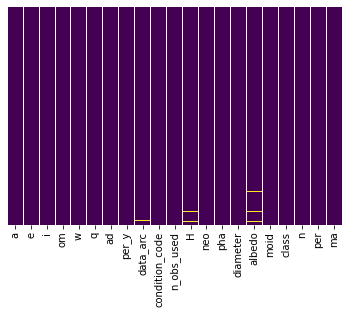

In [ ]:
sns.heatmap(f.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
f.dropna(inplace=True)

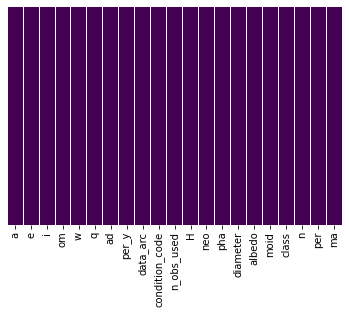

In [ ]:
sns.heatmap(f.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
f.isna().sum()/f.shape[0]

a                 0.0
e                 0.0
i                 0.0
om                0.0
w                 0.0
q                 0.0
ad                0.0
per_y             0.0
data_arc          0.0
condition_code    0.0
n_obs_used        0.0
H                 0.0
neo               0.0
pha               0.0
diameter          0.0
albedo            0.0
moid              0.0
class             0.0
n                 0.0
per               0.0
ma                0.0
dtype: float64

In [ ]:
f.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [ ]:
f['diameter']=f['diameter'].astype('float')

In [ ]:
f['condition_code']=f['condition_code'].astype('float')

In [ ]:
f['diameter'].map(type)

0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
797835    <class 'float'>
797860    <class 'float'>
798077    <class 'float'>
799752    <class 'float'>
810375    <class 'float'>
Name: diameter, Length: 136005, dtype: object

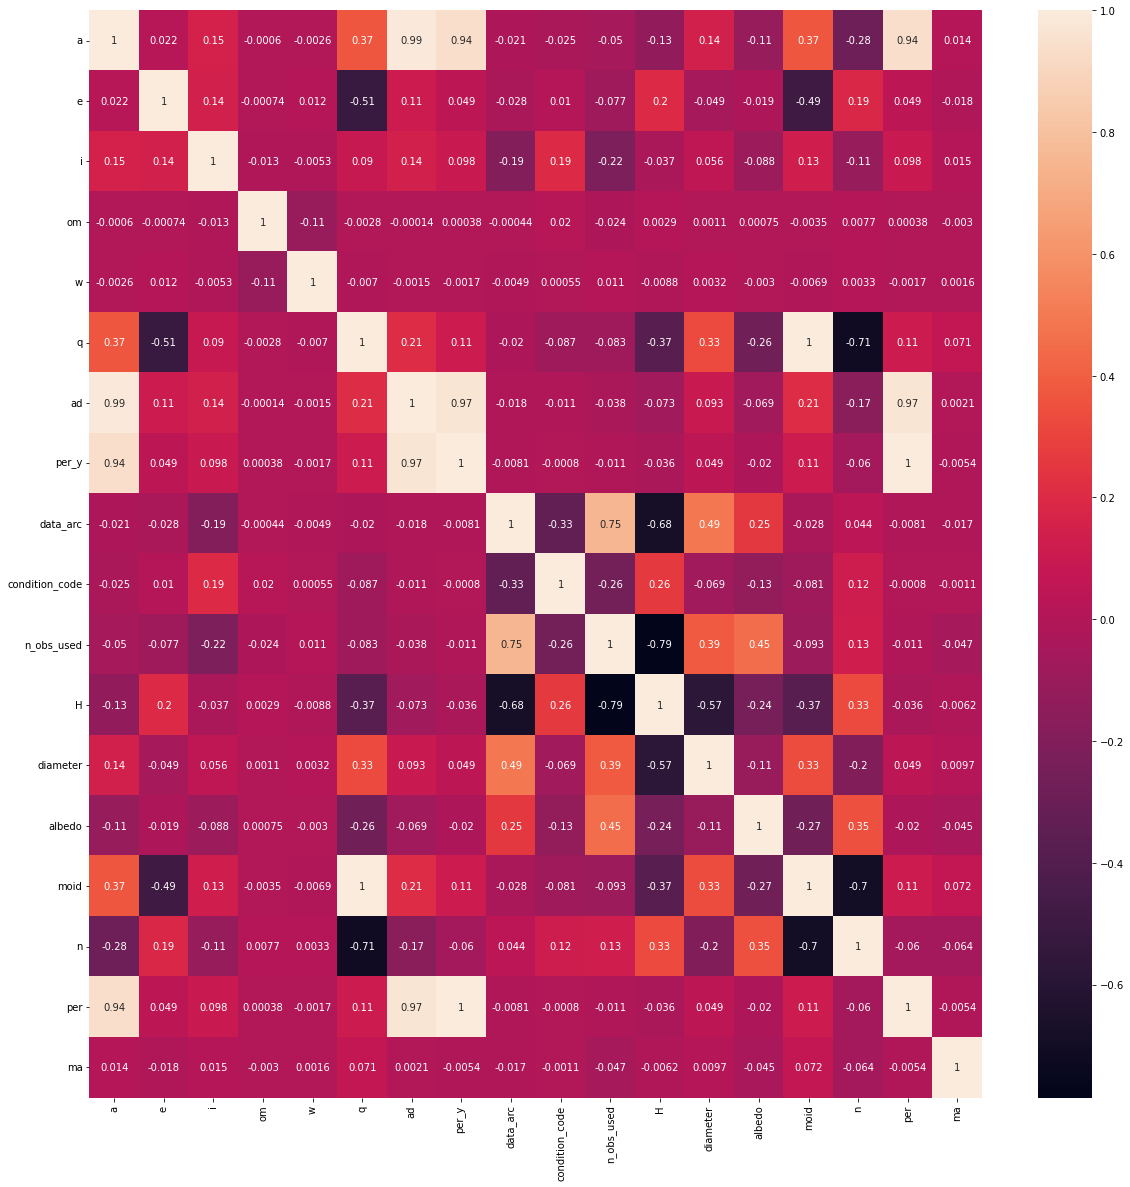

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(f.corr(), annot=True)

In [ ]:
o1=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [ ]:

f['neo']=o1.fit_transform(f[['neo']])
f['pha']=o1.fit_transform(f[['pha']])

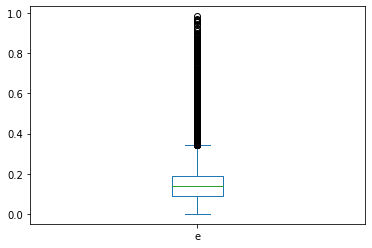

In [ ]:
f.e.plot(kind="box")

In [ ]:
f['e'].tail


<bound method NDFrame.tail of 0         0.076009
1         0.230337
2         0.256942
3         0.088721
4         0.191095
            ...   
797835    0.430349
797860    0.159119
798077    0.076071
799752    0.287449
810375    0.109001
Name: e, Length: 136005, dtype: float64>

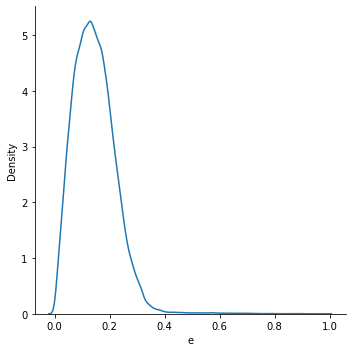

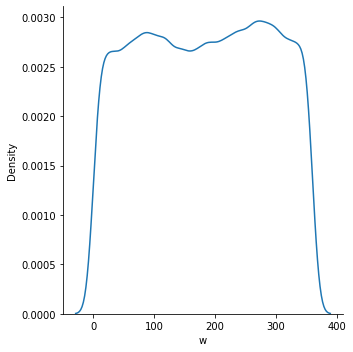

In [ ]:
sns.displot(f,x='e',kind='kde')
sns.displot(f,x='w',kind='kde')

In [ ]:
f=f.assign(new_w=lambda x: np.log(x.w))

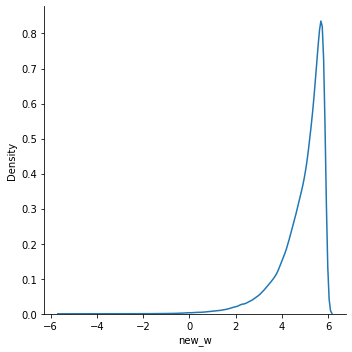

In [ ]:
sns.displot(f,x='new_w',kind='kde')

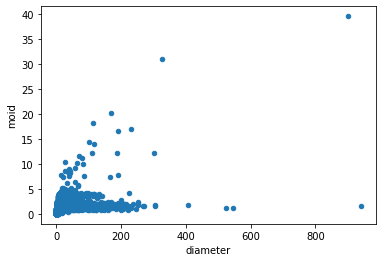

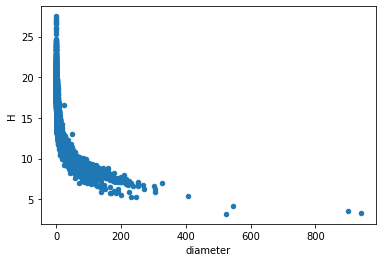

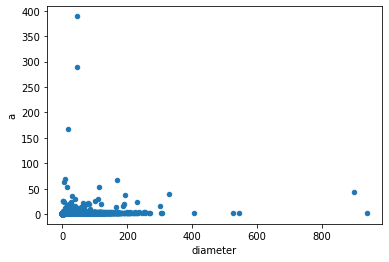

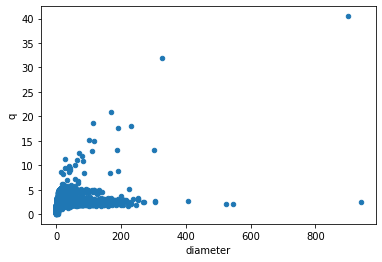

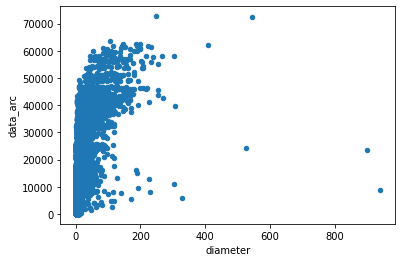

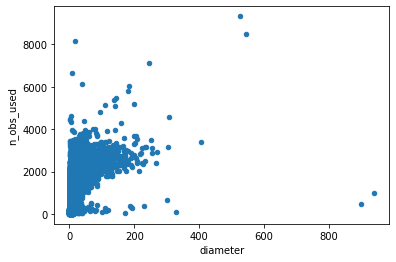

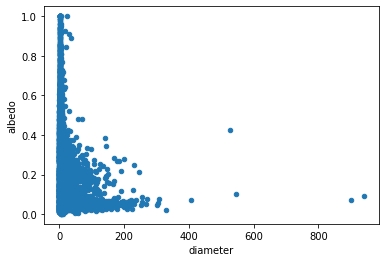

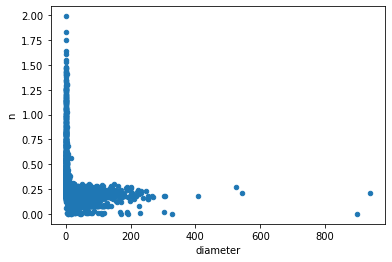

In [ ]:
f.plot(kind = 'scatter', x = 'diameter', y = 'moid')
f.plot(kind = 'scatter', x = 'diameter', y = 'H')
f.plot(kind = 'scatter', x = 'diameter', y = 'a')
f.plot(kind = 'scatter', x = 'diameter', y = 'q')
f.plot(kind = 'scatter', x = 'diameter', y = 'data_arc')
f.plot(kind = 'scatter', x = 'diameter', y = 'n_obs_used')
f.plot(kind = 'scatter', x = 'diameter', y = 'albedo')
f.plot(kind = 'scatter', x = 'diameter', y = 'n')

In [ ]:
f.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code    float64
n_obs_used          int64
H                 float64
neo               float64
pha               float64
diameter          float64
albedo            float64
moid              float64
class             float64
n                 float64
per               float64
ma                float64
new_w             float64
dtype: object

In [ ]:
def objective(x,a,b):
  return a*x+b


In [ ]:
#df = px.data.tips()
y_1=np.array(f['diameter'])
y=-np.log(y_1)
x=np.array(f['H'])
fig = px.scatter(f, x, y, trendline="ols")
fig.show()



from the above figure we get the equation of the regression line which is y=0.380316x -7.1961 

i.e. -log(dia)=0.38031H-7.19614

New feature: new_H=e^(7.19614)e^(-0.38031H)

In [ ]:
y_1=np.array(f['diameter'])
y=np.log(y_1)
x_1=np.array(f['albedo'])
x=np.log(x_1)
fig = px.scatter(f, x, y, trendline="ols")
fig.show()

0.9170383126946535


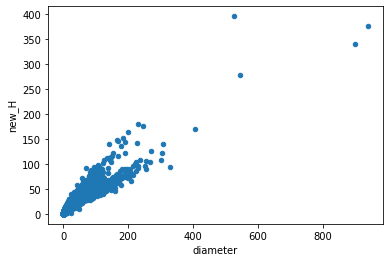

In [ ]:
f=f.assign(new_H=lambda x:np.e**(7.19614)*(np.e**(-0.38031*x.H)))
f.plot(kind = 'scatter', x = 'diameter', y = 'new_H')
print(f['diameter'].corr(f['new_H']))


We see a very HIGH correlation between the new feature and the diameter.

In [ ]:
f=f.assign(b=lambda x:(x.a)*np.sqrt(1-((x.e)**2)))
print(f['diameter'].corr((f['b'])**(0.9)))
#f.plot(kind = 'scatter', x = 'diameter', y = 'albedo')
#f.plot(kind = 'scatter', x = 'diameter', y = 'new_al')

0.3177872937160794


In [ ]:
f=f.assign(dia=lambda x:(x.new_H)/(np.sqrt(x.albedo)))
print(f['diameter'].corr(f['dia']))

0.9696177720453113


In [ ]:
#imp=KNNImputer(n_neighbors=8)
#nn_col=['a','e','i','om','w','q','ad','per_y','condition_code','n_obs_used','neo','pha','diameter','moid','class','n','per']
#nn_col.append('')

In [ ]:
f.isna().sum()/f.shape[0]

a                 0.0
e                 0.0
i                 0.0
om                0.0
w                 0.0
q                 0.0
ad                0.0
per_y             0.0
data_arc          0.0
condition_code    0.0
n_obs_used        0.0
H                 0.0
neo               0.0
pha               0.0
diameter          0.0
albedo            0.0
moid              0.0
class             0.0
n                 0.0
per               0.0
ma                0.0
new_w             0.0
new_H             0.0
b                 0.0
dtype: float64

### Looking at the correlation of various powers of our features with the diameter

In [ ]:
lpow=[i for i in np.arange(0.5,5.5,0.5)]
l=[['']+lpow]
t=0
for i in (f.columns.values.tolist()):
  t+=1
  l.append([i])
  for j in np.arange(0.5,5.5,0.5):
    cor=f['diameter'].corr(f[i]**(j))
    l[t].append(cor)
print(tabulate(l,headers='firstrow',tablefmt='fancy_grid'))

     

╒════════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│                │         0.5 │         1.0 │         1.5 │         2.0 │         2.5 │         3.0 │         3.5 │         4.0 │         4.5 │         5.0 │
╞════════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ a              │  0.278775   │  0.1445     │  0.0489138  │  0.0245918  │  0.0182377  │  0.0161463  │  0.0152341  │  0.0147036  │  0.014318   │  0.0140007  │
├────────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ e              │ -0.0517095  │ -0.0486277  │ -0.0426818  │ -0.0345676  │ -0.0258448  │ -0.0182902  │ -0.0126518  │ -0.00872221 │ -0.00600433 │ -0.0040679  │
├────────────────┼─────────────┼─────────────┼

a^0.5,q^2,ad,per_y,data_arc???,n_obs???,H,albedo,n,moid,new_H,b,dia

drop(e,i,om,w,q,condition_code,neo,pha,class) coz less correlation

In [ ]:
lpow=[i for i in np.arange(-5,0,0.5)]
l=[['']+lpow]
t=0
for i in (f.columns.values.tolist()):
  t+=1
  l.append([i])
  for j in np.arange(-5,0,0.5): 
    cor=f['diameter'].corr(f[i]**(j))
    l[t].append(cor)
print(tabulate(l,headers='firstrow',tablefmt='fancy_grid'))

╒════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤══════════════╕
│                │          -5.0 │          -4.5 │          -4.0 │          -3.5 │          -3.0 │          -2.5 │          -2.0 │          -1.5 │          -1.0 │         -0.5 │
╞════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╪══════════════╡
│ a              │  -0.0284758   │  -0.0383187   │  -0.0530117   │  -0.0741365   │  -0.10242     │  -0.136249    │  -0.171253    │  -0.202887    │  -0.229759    │  -0.25386    │
├────────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼───────────────┼──────────────┤
│ e              │  -0.000335026 │  -0.000362787 │  -0.000387374 │  -0.000392913 │  -0.000328454 │  -1.48152e-

In [ ]:
stdscale=skp.StandardScaler()
lst=f.columns.values.tolist()
lst.remove('diameter')
f[lst]=stdscale.fit_transform(f[lst])

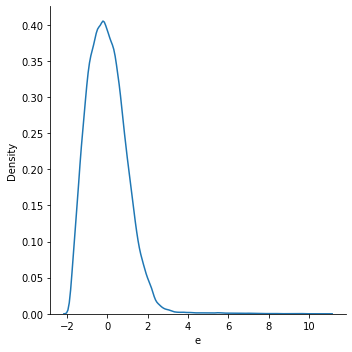

In [ ]:
sns.displot(f,x='e',kind='kde')

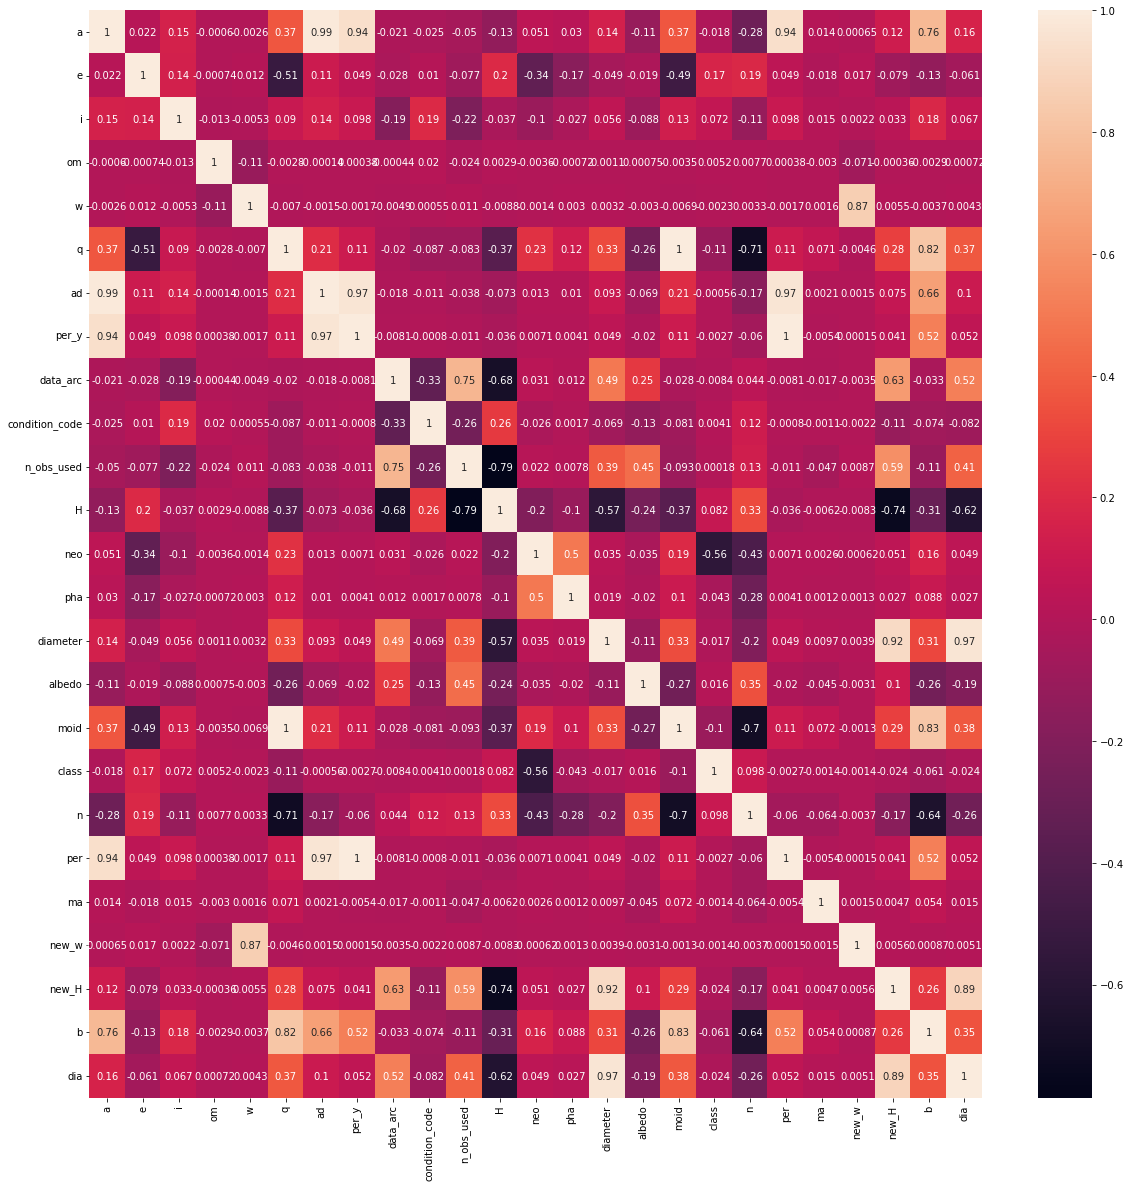

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(f.corr(), annot=True)


In [ ]:
f=f.drop('ad',axis=1)#high correlation with a,redundant


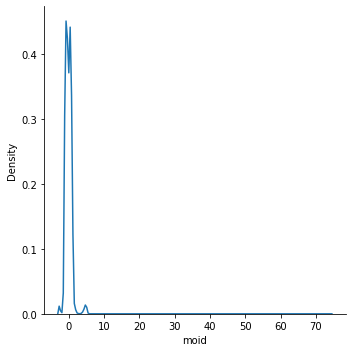

In [ ]:
sns.displot(f,x='moid',kind='kde')

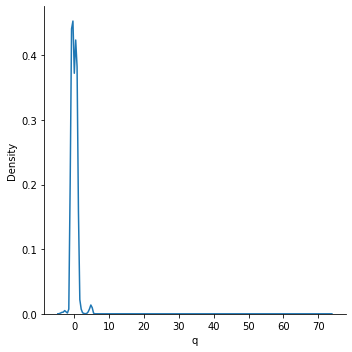

In [ ]:
sns.displot(f,x='q',kind='kde')

In [ ]:
f=f.drop('per_y',axis=1)#high correlation with some other existing features and hence redundant  
f=f.drop('b',axis=1)
f=f.drop('per',axis=1)
f=f.drop('n',axis=1)
f=f.drop('dia',axis=1)

S.No.  |Column Name     | Description
-------|----------------|------------
1.     |name            |Asteroid Name
2.     |a               |Semi Major Axis (au)
3.     |e               |Eccentricity
4.     |i               |Inclination with respect to x-y Ecliptic Plane (deg)
5.     |om              |Longitude of the Ascending Node
6.     |w               |Argument of Perihelion
7.     |q               |Perihelion Distance (au)
8.     |ad              |Aphelion Distance (au)
9.     |per_y           |Orbital Period (Years)
10.    |data_arc        |Data Arc-Span (d)
11.    |condition_code  |Orbit Condition Code
12.    |n_obs_used      |Number of Observation Used
13.    |H               |Absolute Magnitude Parameter
14.    |neo             |Near Earth Object
15.    |pha             |Physically Hazardous Asteroid
16.    |diameter        |Diameter of Asteroid (Km)
17.    |extent          |Object bi/tri-Axial Ellipsoid Dimensions(Km)
18.    |albedo          |Geometric Albedo
19.    |rot_per         |Rotation Period (h)
20.    |GM              |Standard Gravitational Parameter (Product of Mass and Gravitational Constant)
21.    |BV              |Color Index B-V Magnitude Difference
22.    |UB              |Color Index U-B Magnitude Difference
23.    |IR              |Color Index I-R Magnitude Difference
24.    |spec_B          |Spectral Taxonomic Type (SMASSII)
25.    |spec_T          |Spectral Taxonomic Type (Tholen)
26.    |G               |Magnitude Slope Parameter
27.    |moid            |Earth Minimum Orbit Intersection Distance (au)
28.    |class           |Asteroid Orbit Class
29.    |n               |Mean Motion (deg/d)
30.    |per             |Orbital Period (d)
31.    |ma              |Mean Anomaly (deg)